<center><img src="img/logo_hse_black.jpg"></center>

<h1><center>Data Analysis</center></h1>
<h2><center>Seminar: Metric-based models</center></h2>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Curse of dimentionality

## Euclidean distance case

* For each dimensionality $d \in [1, 200]$ generate a dataset of $100$ random points from uniform distribution
on $[−1, 1]^d$
    * HINT: `np.random.uniform`.


* Write the function that calculates Euclidean distances from the given point $x$ to its nearest and farthest
neighbors in the dataset (minimum and maximum distances).
    * HINT: `scipy.spatial.distance.cdist`, `np.max`, `np.min`


* Plot average minimum and maximum distances for varying $d$ (here you should calculate average values on dataset). Also plot their ratio — average maximum divided by average minimum. Does curse of dimentionality takes place here?

In [32]:
d = 2
X = np.random.uniform(low=-1, high=1, size=(100, d))


In [33]:
X.shape

(100, 2)

In [34]:
X[:10]

array([[ 0.73654546, -0.53508924],
       [ 0.13326989, -0.33384221],
       [ 0.83793726, -0.1001098 ],
       [-0.59605552, -0.8677398 ],
       [ 0.89937158, -0.35388023],
       [-0.19646545,  0.99143449],
       [ 0.74853378,  0.01124276],
       [ 0.23569756, -0.89157138],
       [-0.11679622, -0.97066621],
       [-0.48815392, -0.76705916]])

In [35]:
from scipy.spatial.distance import cdist

In [36]:
D = cdist(X, X, )

In [37]:
D.shape

(100, 100)

In [38]:
np.max(D, axis=1)

array([ 2.06014576,  1.53377137,  1.91761728,  2.32529957,  2.05199719,
        2.13059754,  1.89448022,  2.07361522,  2.14612371,  2.17913366,
        1.32623546,  1.91179886,  1.90132704,  1.97658203,  2.19968212,
        2.11737897,  1.93208459,  2.11157819,  2.20776802,  1.60345304,
        2.39855546,  1.60453937,  1.90320473,  2.24682916,  1.97734221,
        1.97417565,  1.87464105,  1.33732102,  1.56967574,  1.99478387,
        1.92628125,  1.83620011,  2.03912573,  2.18191512,  1.97606883,
        1.88944968,  2.24278887,  2.32060187,  1.52827913,  1.74614204,
        2.58689539,  1.94257062,  1.76955929,  1.88073415,  1.56647416,
        2.06690878,  1.89323803,  1.72943891,  2.09191642,  2.08488274,
        2.58689539,  1.49815333,  2.19714944,  2.18447767,  2.16419715,
        1.75168092,  2.04365848,  2.08134191,  1.99727527,  1.98370219,
        1.7280355 ,  2.10092139,  2.39855546,  1.9566921 ,  2.30017722,
        1.92617504,  1.91281228,  1.8126249 ,  1.99964581,  1.48

In [39]:
np.min(D, axis=1)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [40]:
min_avg = []
max_avg = []

for d in range(1, 201):
    X = np.random.uniform(-1, 1, (100, d))
    
    D = cdist(X, X, metric='euclidean')
    D[np.diag_indices(100)] = np.nan
    
    min_avg.append(np.nanmin(D, axis=1).mean())
    max_avg.append(np.nanmax(D, axis=1).mean())

In [41]:
len(min_avg)

200

In [42]:
min_avg = np.array(min_avg)
max_avg = np.array(max_avg)

In [43]:
ratio = max_avg/min_avg

In [44]:
ratio.shape

(200,)

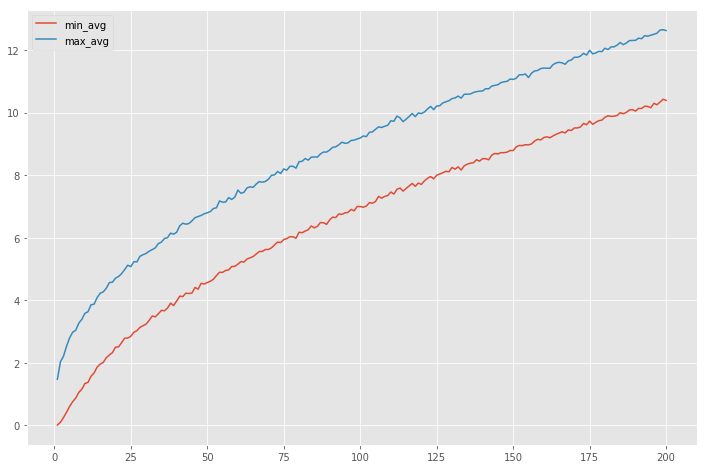

In [45]:
d = range(1,201)
plt.plot(d, min_avg, label='min_avg')
plt.plot(d, max_avg, label='max_avg')
plt.legend()

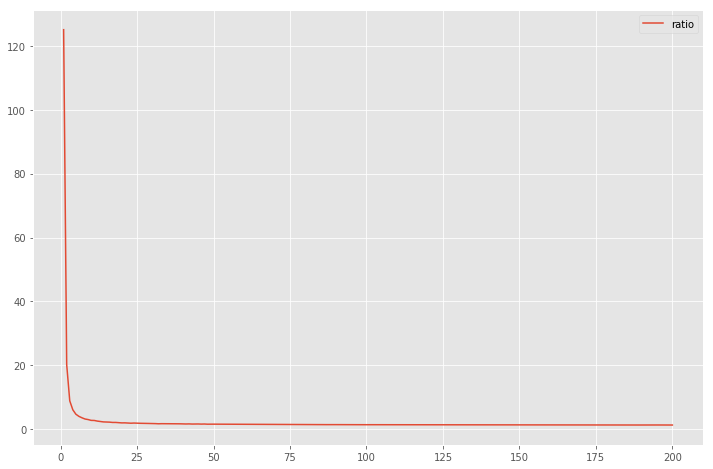

In [46]:
plt.plot(d, ratio, label='ratio')
plt.legend()

## Cosine distance case

* For each dimensionality $d \in [1, 10, 100, ..., 10000]$ generate a dataset of $100$ random points from uniform distribution
on $[−1, 1]^d$
    * HINT: `np.logspace`.


* Write the function that calculates angles between all points in dataset.
    * HINT: `np.degrees`, `np.arccos`


* Plot a histogram of computed angles for each $d$. Does curse of dimentionality takes place here?

In [47]:
D

array([[         nan,  11.53538358,  11.69259979, ...,  11.91648358,
         11.45860673,  11.43822633],
       [ 11.53538358,          nan,  11.96474791, ...,  11.95225296,
         11.88672083,  11.88946855],
       [ 11.69259979,  11.96474791,          nan, ...,  12.05435775,
         10.06464584,  11.54830206],
       ..., 
       [ 11.91648358,  11.95225296,  12.05435775, ...,          nan,
         11.48193688,  12.06726755],
       [ 11.45860673,  11.88672083,  10.06464584, ...,  11.48193688,
                 nan,  11.41920825],
       [ 11.43822633,  11.88946855,  11.54830206, ...,  12.06726755,
         11.41920825,          nan]])

/Users/andrey.shestakov/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in arccos


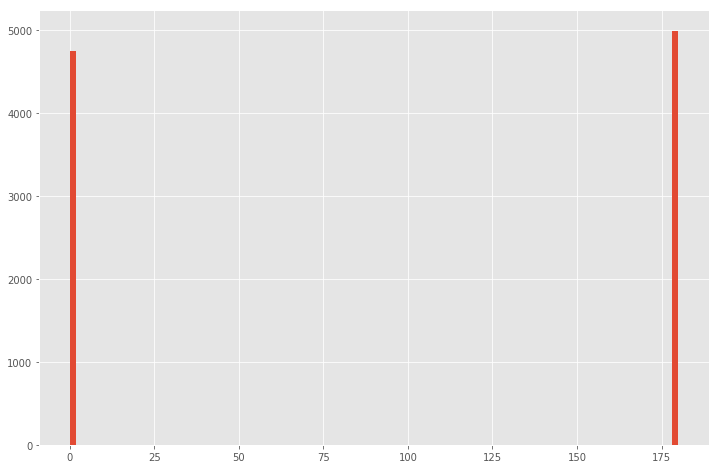

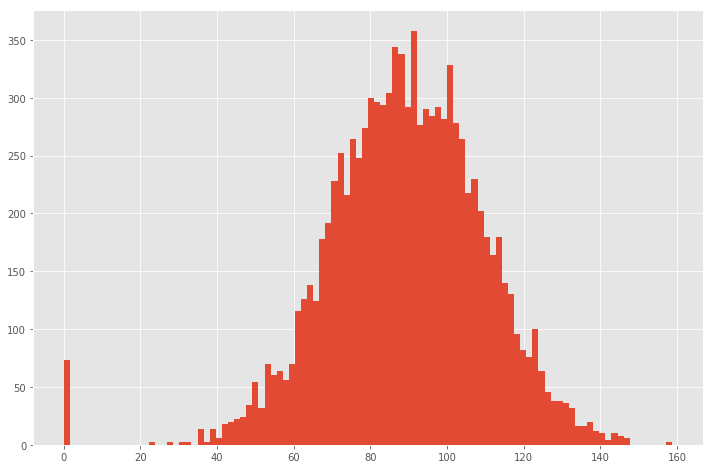

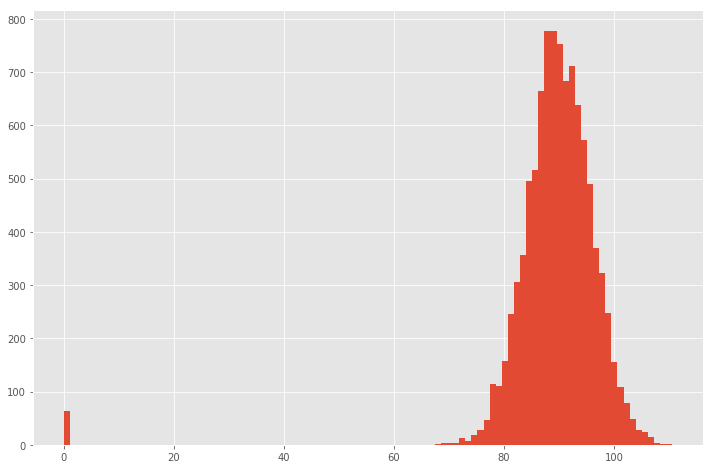

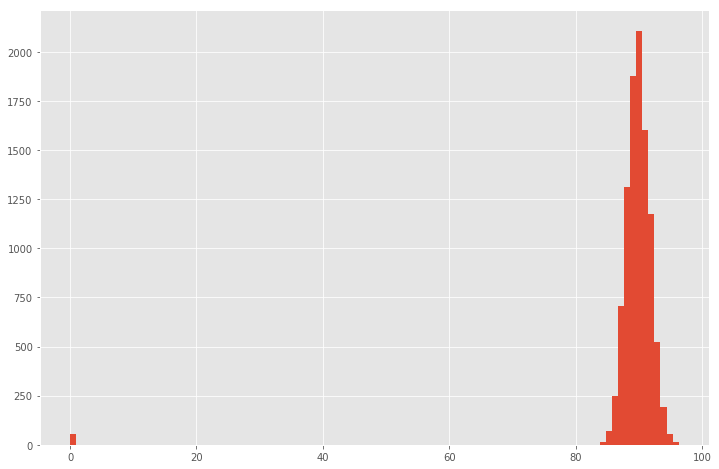

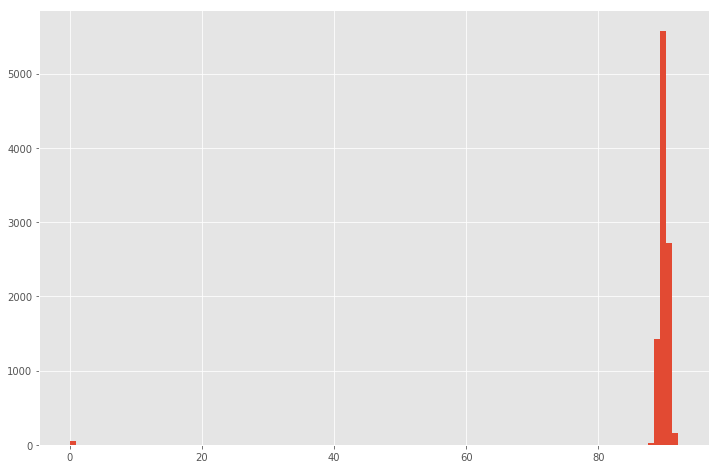

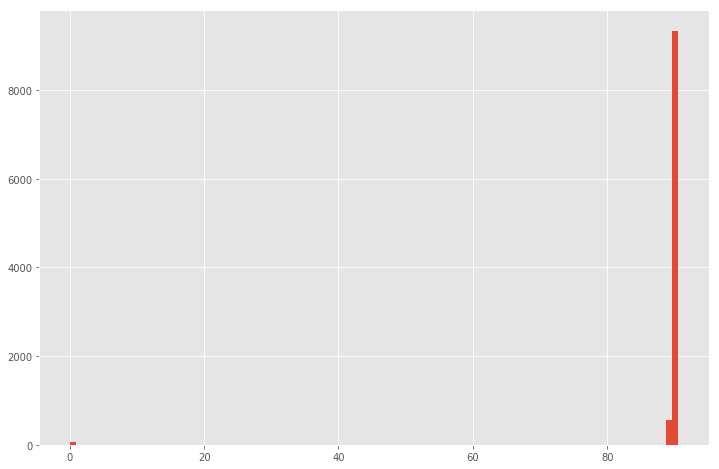

In [48]:
for d in np.logspace(0, 5, num=6, base=10, dtype=int):
    X = np.random.uniform(-1, 1, (100, d))
    
    D = cdist(X, X, metric='cosine')
#     D[np.diag_indices(100)] = np.nan
    D = -(D-1)
    angle_avg = (np.degrees(np.arccos(D))).flatten()

    plt.figure()
    plt.hist(angle_avg[~np.isnan(angle_avg)], bins=100)

# House prices in California

We are going to use build-in sklearn dataset

In [49]:
from sklearn.datasets import fetch_california_housing

In [50]:
data = fetch_california_housing()

X = data.data
y = data.target

In [51]:
print(data.DESCR)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/datasets/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




* Plot lat and lon coordinates of each household and colorize it with respect to value of target feature
    * HINT: `plt.scatter()`

(array([  877.,  3612.,  4099.,  3771.,  2799.,  1769.,  1239.,   752.,
          479.,  1243.]),
 array([ 0.14999 ,  0.634992,  1.119994,  1.604996,  2.089998,  2.575   ,
         3.060002,  3.545004,  4.030006,  4.515008,  5.00001 ]),
 <a list of 10 Patch objects>)

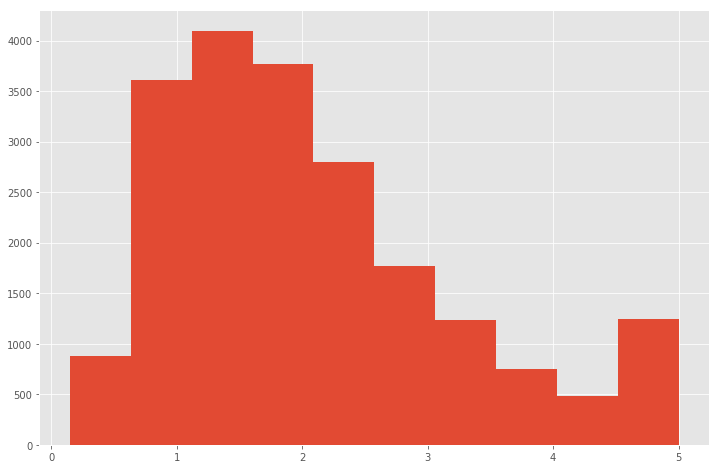

In [52]:
plt.hist(y)

In [53]:
X = X[:, -2:]

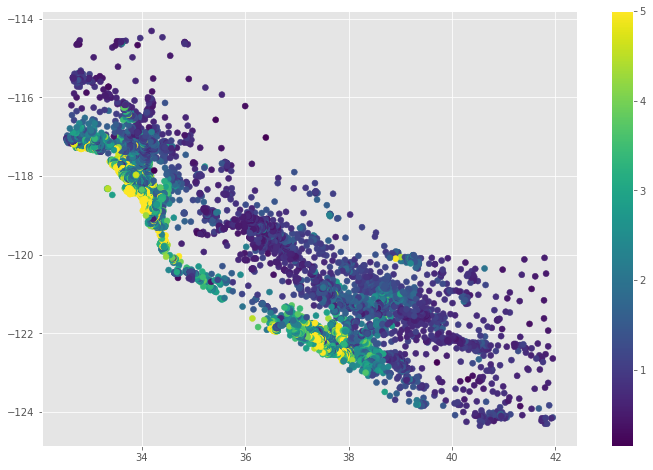

In [54]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.colorbar()

* Consider only geo-coordinates of houses in design matrix and convert them to radians
    * HINT: `np.radians`
* Split dataset to train and validation set on proportion 80/20
    * HINT: `sklearn.model_selection.train_test_split()` and don't forget to set `random_state`

In [55]:
X = np.radians(X)

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size=0.2,
                                                      random_state=123)

In [58]:
X_train.shape

(16512, 2)

In [59]:
X_valid.shape

(4128, 2)

* Consider k-NN classifier with `haversine` distance metric
    * HINT: sklearn.metrics
* For k in 1..15 plot mean squared error at train and validation set
    * noticed any methodological failures?
    * whick $k$ would you pick?

In [60]:
from sklearn.neighbors import KNeighborsRegressor

In [61]:
knn = KNeighborsRegressor(n_neighbors=2, metric='haversine', 
                           algorithm='ball_tree')

In [62]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=30, metric='haversine',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

In [63]:
y_hat = knn.predict(X_train)

In [64]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_train, y_hat)

0.21116684714147288

In [ ]:
scores_valid = []
scores_train = []

for k in range(1, 16):
    knn = KNeighborsRegressor(n_neighbors=k, algorithm='ball_tree',
                              metric='haversine')
    knn.fit(X_train, y_train)
    
    y_hat_train = knn.predict(X_train)
    y_hat_valid = knn.predict(X_valid)
    
    scores_train.append(mean_absolute_error(y_train, y_hat_train))
    scores_valid.append(mean_absolute_error(y_valid, y_hat_valid))

In [ ]:
plt.plot(scores_train, label='train')
plt.plot(scores_valid, label='valid')
plt.legend()

* Pick your model and colorize the whole lat-lon grid with its predictions
    * HINT: `np.meshgrid()`, `plt.contourf()`

# Churn prediction

* Load churn dataset from the csv file with pandas
* Describe type of each feature
* Describe scale of each feature

In [ ]:
# Your code here

* Prepare dataset
    * Delete useless features
    * Encode categorical and binary features
    * Create matrix `X` with predictors and array `y` with target feature
    * Split it to train and validation set in proportion 80/20

In [ ]:
# Your code here

 * For k in 1..15 plot roc-auc score at train and validation set

In [ ]:
# Your code here

* Consider feature normalization
    * HINT: `sklearn.preprocess.StantardScaler()`
* Build a pipeline that would normalize features before using K-NN
    * HINT: `sklearn.pipeline`
* For k in 1..15 plot roc-auc score at train and validation set
    * Does it make any difference?

In [ ]:
# Your code here